In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_selection import SelectFromModel,RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Lasso
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn import svm
import pandas as pd
import numpy as np
import pickle
import os
np.random.seed(123)

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
par_path = "/content/drive/MyDrive/Colab Notebooks/Muawiya/Js_Contana/On JavaScript File/Hiden"
model_info_path = "/content/drive/MyDrive/Colab Notebooks/Muawiya/Js_Contana/On JavaScript File/Results_TabuSearch/Model info"
results_path = "/content/drive/MyDrive/Colab Notebooks/Muawiya/Js_Contana/On JavaScript File/Results_TabuSearch3"
data_path = "/content/drive/MyDrive/Colab Notebooks/Muawiya/Js_Contana/On JavaScript File/DataSets"
dfs_results = "/content/drive/MyDrive/Colab Notebooks/Muawiya/Js_Contana/On JavaScript File/Featuer_selection_results"
statistical_information = "/content/drive/MyDrive/Colab Notebooks/Muawiya/Js_Contana/On JavaScript File/statistical information"

In [4]:
def save_object(obj, filename,path):
    """
    _ INPUT (obj) THE OBJECT WE NEED SAVW IT (filename) THE NAME OF OBJECT
    """
    filename = os.path.join(path,filename)
    with open(filename+".pkl", 'wb') as outp:
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)
    outp.close()

In [5]:
def load_object(filename,path):
    """
    _ INPUT THE NAME OF OBJECT WE NEED LOAD IT
    """
    filename = os.path.join(path,filename)
    with open(filename+".pkl", 'rb') as outp:
        loaded_object = pickle.load(outp)
    outp.close()
    return loaded_object

In [6]:
number_of_chunk =[i[:-4] for i in os.listdir(par_path)[::-1] if i[:7]=='X_train']
number_of_chunk = number_of_chunk[:-1]

In [ ]:
# for i,x in tqdm(enumerate(number_of_chunk)):
#   Range_of_values ,median ,mean ,standard_deviation ,variance ,maximum ,minimum ,sum,first_quartile ,second_quartile ,third_quartile = [],[],[],[],[],[],[],[],[],[],[]
#   X_train = load_object('X_train_hiden_for_chunk_'+str(i),par_path) #, load_object('y_train_hiden_for_chunk_'+str(i),par_path)
#   X_test = load_object('X_test_hiden_for_chunk_'+str(i),par_path) #, load_object('y_test_hiden_for_chunk_'+str(i),par_path)
#   for j,x_train in enumerate(X_train):
#     # Range_of_values.append(np.ptp(x_train,axis=0)) # Range_of_values (maximum - minimum)
#     # median.append(np.median(x_train))
#     standard_deviation.append(np.std(x_train,axis=0)) # *
#     mean.append(np.mean(x_train,axis=0)) # *
#     # variance.append(np.var(x_train,axis=0))
#     maximum.append(np.max(x_train,axis=0))  # *
#     minimum.append(np.min(x_train,axis=0))  # *
#     # sum.append(np.sum(x_train))
#     # first_quartile.append(np.percentile(x_train, 25,axis=0)) # *
#     second_quartile.append(np.percentile(x_train, 50,axis=0))  # Median is the second quartile # *
#     # third_quartile.append(np.percentile(x_train, 75,axis=0)) # *
#   df = pd.DataFrame(np.concatenate([standard_deviation,mean,maximum,minimum,second_quartile],axis=-1))
#   df.to_csv(os.path.join(statistical_information,'statistical information for train data chunk number'+str(i)+'.csv'), index=False)
#   Range_of_values ,median ,mean ,standard_deviation ,variance ,maximum ,minimum ,sum,first_quartile ,second_quartile ,third_quartile = [],[],[],[],[],[],[],[],[],[],[]
#   for j,x_test in enumerate(X_test):
#     # Range_of_values.append(np.ptp(x_test,axis=0))
#     # median.append(np.median(x_test))
#     standard_deviation.append(np.std(x_test,axis=0)) #*
#     mean.append(np.mean(x_test,axis=0)) # *
#     # variance.append(np.var(x_test,axis=0))
#     maximum.append(np.max(x_test,axis=0)) # *
#     minimum.append(np.min(x_test,axis=0)) # *
#     # sum.append(np.sum(x_test))
#     # first_quartile.append(np.percentile(x_test, 25,axis=0)) # *
#     second_quartile.append(np.percentile(x_test, 50,axis=0))  # Median is the second quartile # *
#     # third_quartile.append(np.percentile(x_test, 75,axis=0)) # *
#   df = pd.DataFrame(np.concatenate([standard_deviation,mean,maximum,minimum,second_quartile],axis=-1))
#   df.to_csv(os.path.join(statistical_information,'statistical information for test data chunk number'+str(i)+'.csv'), index=False)

0it [00:00, ?it/s]

In [7]:
def Matric_dic():
  return {"accuracy_score":[],"precision_score":[],"recall_score":[],"f1_score":[]}

In [8]:
def Model_dic():
  return {"KNeighbors":Matric_dic(),"DecisionTree":Matric_dic(),"LogisticRegression":Matric_dic(),"GaussianNB":Matric_dic(),"SVM":Matric_dic()}

In [9]:
def Evaluation(NAME,models,mask):
  for OBJ_model in models:
      model_name, model = OBJ_model[0], OBJ_model[1]
      model.fit(X_train*mask, y_train)
      y_pred = model.predict(X_test*mask)
      Results[NAME][model_name]['accuracy_score'].append(accuracy_score(y_test, y_pred))
      Results[NAME][model_name]['precision_score'].append(precision_score(y_test, y_pred))
      Results[NAME][model_name]['recall_score'].append(recall_score(y_test, y_pred))
      Results[NAME][model_name]['f1_score'].append(f1_score(y_test, y_pred))

In [10]:
Results = {"Random Forest":Model_dic(),
           "Lasso":Model_dic(),
           "RFE":Model_dic(),
           }

In [ ]:
# # random forest
# sel = SelectFromModel(RandomForestClassifier())
# RandomForest_models = [("KNeighbors",KNeighborsClassifier(5)),("DecisionTree",DecisionTreeClassifier(max_depth=1,random_state=42)),("LogisticRegression",LogisticRegression(max_iter=500)),("GaussianNB",GaussianNB()),("SVM",svm.SVC(kernel='rbf', max_iter=8000, C=0.2, probability=True))]

# # Lasso
# lasso = Lasso(alpha=0.1)  # alpha is the regularization strength
# Lasso_models = [("KNeighbors",KNeighborsClassifier(5)),("DecisionTree",DecisionTreeClassifier(max_depth=1,random_state=42)),("LogisticRegression",LogisticRegression(max_iter=500)),("GaussianNB",GaussianNB()),("SVM",svm.SVC(kernel='rbf', max_iter=8000, C=0.2, probability=True))]

# # RFE
# rfe = RFE(RandomForestClassifier())
# RFE_models = [("KNeighbors",KNeighborsClassifier(5)),("DecisionTree",DecisionTreeClassifier(max_depth=1,random_state=42)),("LogisticRegression",LogisticRegression(max_iter=500)),("GaussianNB",GaussianNB()),("SVM",svm.SVC(kernel='rbf', max_iter=8000, C=0.2, probability=True))]

# for i,_ in tqdm(enumerate(number_of_chunk)):

#   X_train = pd.read_csv(os.path.join(statistical_information,'statistical information for train data chunk number'+str(i)+'.csv'))
#   X_test = pd.read_csv(os.path.join(statistical_information,'statistical information for test data chunk number'+str(i)+'.csv'))
#   y_train = load_object('y_train_hiden_for_chunk_'+str(i),par_path)
#   y_test = load_object('y_test_hiden_for_chunk_'+str(i),par_path)

#   # ****************************** Random Forest ************************************
#   NAME = 'Random Forest'
#   sel.fit(X_train, y_train)
#   random_forest_mask = sel.get_support()
#   random_forest_mask = random_forest_mask.astype(int)
#   save_object(random_forest_mask, "random_forest_mask"+str(i),statistical_information)
#   Evaluation(NAME,RandomForest_models,random_forest_mask)

#   # ********************************** Lasso ********************************
#   NAME = 'Lasso'
#   lasso.fit(X_train, y_train)
#   lasso_mask = lasso.coef_ !=0
#   lasso_mask = lasso_mask.astype(int)
#   save_object(lasso_mask, "lasso_mask"+str(i),statistical_information)
#   Evaluation(NAME,Lasso_models,lasso_mask)

#   # ********************************** RFE ********************************
#   NAME = 'RFE'
#   rfe.fit(X_train, y_train)
#   rfe_mask = rfe.support_
#   rfe_mask = rfe_mask.astype(int)
#   save_object(rfe_mask, "rfe_mask"+str(i),statistical_information)
#   Evaluation(NAME,RFE_models,rfe_mask)

#   print("============================================================================")
#   print(Results)
#   save_object(Results, "Results",statistical_information)

0it [00:00, ?it/s]

{'Random Forest': {'KNeighbors': {'accuracy_score': [0.695], 'precision_score': [0.6966824644549763], 'recall_score': [0.7170731707317073], 'f1_score': [0.7067307692307692]}, 'DecisionTree': {'accuracy_score': [0.8175], 'precision_score': [0.9714285714285714], 'recall_score': [0.6634146341463415], 'f1_score': [0.7884057971014492]}, 'LogisticRegression': {'accuracy_score': [0.5075], 'precision_score': [1.0], 'recall_score': [0.03902439024390244], 'f1_score': [0.07511737089201878]}, 'GaussianNB': {'accuracy_score': [0.64], 'precision_score': [0.6445497630331753], 'recall_score': [0.6634146341463415], 'f1_score': [0.6538461538461539]}, 'SVM': {'accuracy_score': [0.65], 'precision_score': [0.6570048309178744], 'recall_score': [0.6634146341463415], 'f1_score': [0.6601941747572816]}}, 'Lasso': {'KNeighbors': {'accuracy_score': [0.6925], 'precision_score': [0.7029702970297029], 'recall_score': [0.6926829268292682], 'f1_score': [0.6977886977886978]}, 'DecisionTree': {'accuracy_score': [0.625],

In [ ]:
# subheadings = list(Results.keys())
# column_headings1 = list(Results[subheadings[0]].keys())
# column_headings2 = list(Results[subheadings[0]][column_headings1[0]].keys())
# columns = pd.MultiIndex.from_product([subheadings, column_headings1,column_headings2])
# Results = load_object("Results",statistical_information)
# df = pd.DataFrame(columns=columns)
# for i in subheadings:
#   for j in column_headings1:
#     for k in column_headings2:
#       df[i,j,k]=Results[i][j][k]
# df.to_csv(os.path.join(statistical_information,"Numerical Results.csv"),index=False)
# df.head()

Random Forest                                                        \
      KNeighbors                                          DecisionTree   
  accuracy_score precision_score recall_score  f1_score accuracy_score   
0         0.6950        0.696682     0.717073  0.706731         0.8175   
1         0.7475        0.729167     0.740741  0.734908         0.8850   
2         0.6975        0.695876     0.685279  0.690537         0.9250   
3         0.7275        0.711443     0.737113  0.724051         0.9075   

                                                                             \
                                         LogisticRegression                   
  precision_score recall_score  f1_score     accuracy_score precision_score   
0        0.971429     0.663415  0.788406             0.5075        1.000000   
1        0.938650     0.809524  0.869318             0.7825        0.721739   
2        0.966480     0.878173  0.920213             0.7425        0.699153   
3        0.953757     0.850515  0.899183             0.6000        0.972222   

   ...                RFE                                           \
   ... LogisticRegression               GaussianNB                   
   ...       recall_score  f1_score accuracy_score precision_score   
0  ...           0.770732  0.733179         0.6875        0.770270   
1  ...           0.285714  0.433735         0.7500        0.748603   
2  ...           0.913706  0.831409         0.7225        0.786667   
3  ...           0.963918  0.840449         0.7450        0.815068   

                                                                                
                                    SVM                                         
  recall_score  f1_score accuracy_score precision_score recall_score  f1_score  
0     0.556098  0.645892         0.6350        0.637209     0.668293  0.652381  
1     0.708995  0.728261         0.7175        0.686275     0.740741  0.712468  
2     0.598985  0.680115         0.6550        0.616601     0.791878  0.693333  
3     0.613402  0.700000         0.6575        0.625551     0.731959  0.674584  

[4 rows x 60 columns]

In [ ]:
def plot_results(metric_name,model_name, methods_name, results, step=1):
    plt.figure(figsize=(15, 5))
    plt.title(metric_name+" by "+model_name)
    for k, result in enumerate(results):
        x = [i for i, x in enumerate(results[k]) if i % step == 0]
        y = [x for i, x in enumerate(results[k]) if i % step == 0]
        plt.plot(x, y,  label=methods_name[k])
        plt.scatter(x, y,s=20)  # Add dots to the plot

    plt.legend(loc="best")
    plt.xlabel('Chunk number')
    plt.ylabel('Results per Chunk')

    # Format x-axis ticks as integers
    plt.xticks(rotation=90)
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(step))
    plt.gca().xaxis.set_major_formatter(plt.ScalarFormatter(useOffset=False, useMathText=True))

    name_image = metric_name+"_"+model_name+"_".join(methods_name)
    save_path = os.path.join(statistical_information, 'Imges')

    plt.savefig(os.path.join(save_path, name_image+".png"))
    plt.savefig(os.path.join(save_path, name_image+'.svg'), format='svg')
    plt.show()

In [11]:
# Tabu_search = pd.read_csv(os.path.join(os.path.join(results_path,'Imges'),"Numerical results.csv"))
# tabu_search_results = {"accuracy_score":Tabu_search['Accuracy_score'].tolist()[:len(number_of_chunk)],
#                        "precision_score":Tabu_search['Precision_score'].tolist()[:len(number_of_chunk)],
#                        "recall_score":Tabu_search['Recall_score'].tolist()[:len(number_of_chunk)],
#                        "f1_score":Tabu_search['F1_score'].tolist()[:len(number_of_chunk)]}
# Results = load_object("Results",statistical_information)

# methods_name = list(Results.keys())+['2TS-DFS']
# models_name = list(Results[methods_name[0]].keys())
# metrices_name = list(Results[methods_name[0]][models_name[0]].keys())
# for model_name in models_name:
#   for metric_name in metrices_name:
#     plot_results(metric_name,model_name,methods_name, [Results[methods_name[0]][model_name][metric_name],Results[methods_name[1]][model_name][metric_name],Results[methods_name[2]][model_name][metric_name],tabu_search_results[metric_name]])

In [18]:
def plot_dimensional_reduction(Random_Forest,Lasso,RFE,tabu_search):
  # set width of bar
  barWidth = 0.05
  fig = plt.subplots(figsize =(8, 5))
  # Set position of bar on X axis
  br1 = np.arange(len(Random_Forest))
  br2 = [x + barWidth for x in br1]
  br3 = [x + barWidth for x in br2]
  br4 = [x + barWidth for x in br3]

  # Make the plot
  plt.bar(br1, Random_Forest, color ='r', width = barWidth,edgecolor ='grey', label ='Random Forest')
  plt.bar(br2, Lasso, color ='g', width = barWidth,edgecolor ='grey', label ='Lasso')
  plt.bar(br3, RFE, color ='b', width = barWidth,edgecolor ='grey', label ='RFE')
  plt.bar(br4, RFE, color ='m', width = barWidth,edgecolor ='grey', label ='2TS-DFS')

  # Adding Xticks
  plt.xlabel('Chunk number', fontweight ='bold', fontsize = 10)
  plt.ylabel('Remaining Dimensions as a percentage', fontweight ='bold', fontsize = 8)
  plt.xticks([r + barWidth for r in range(len(number_of_chunk))],[str(i) for i,_ in enumerate(number_of_chunk)])
  plt.legend(loc="best")
  plt.savefig(os.path.join(os.path.join(statistical_information,'Imges'),"Dimensional reduction amount"))
  plt.savefig(os.path.join(os.path.join(statistical_information,'Imges'),"Dimensional reduction amount.svg"),format='svg')
  plt.show()

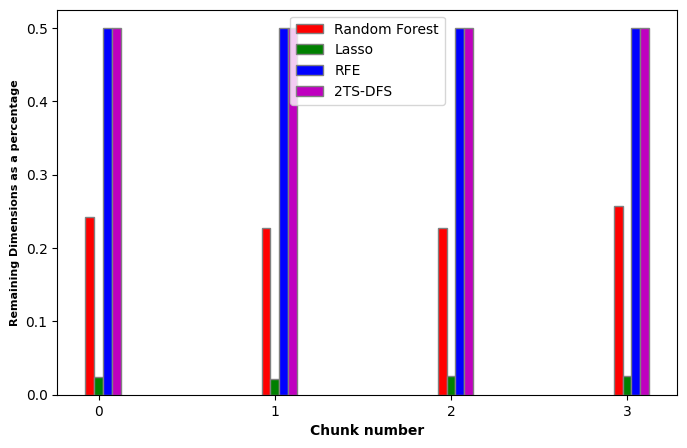

In [19]:
Random_Forest,Lasso,RFE = [],[],[]
tabu_search = load_object('_tabu',results_path)
for i in range(len(number_of_chunk)):
  Random_Forest.append(np.sum(load_object("random_forest_mask"+str(i),statistical_information))/500)
  Lasso.append(np.sum(load_object("lasso_mask"+str(i),statistical_information))/500)
  RFE.append(np.sum(load_object("rfe_mask"+str(i),statistical_information))/500)
  tabu_search[i] = tabu_search[i]/100
plot_dimensional_reduction(Random_Forest,Lasso,RFE,tabu_search)

In [ ]:
from google.colab import runtime
runtime.unassign()